In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as sm
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya')
print(os.getcwd())

C:\Apurva\Conservation Games\Games meta-analysis\Datasets\Data Gabon, Orkney, Madagascar and Kenya


In [3]:
data = pd.read_csv('combined6.csv', index_col=0)
len(data)

11949

In [4]:
data.columns

Index(['Rel3_2', 'subsidy', 'Education_2', 'RespHOH_1', 'Rel2_3', 'GameID',
       'Rel2_2', 'Age_3', 'Rel3_3', 'Treatments', 'Gender_4', 'Rel3_1',
       'country', 'Rel1_1', 'Age_4', 'Age_2', 'Education_3', 'Rel2_4',
       'Gender_1', 'Gender_2', 'Education_4', 'RespHOH_2', 'Gender_3',
       'RespHOH_4', 'Education_1', 'Rel1_4', 'Rel2_1', 'RespHOH_3', 'Age_1',
       'Rel1_3', 'Rel3_4', 'envProduction', 'Rel1_2'],
      dtype='object')

In [5]:
np.unique([x[:-2] for x in data.columns.values])

array(['Age', 'Education', 'Game', 'Gender', 'Rel1', 'Rel2', 'Rel3',
       'RespHOH', 'Treatmen', 'count', 'envProducti', 'subsi'],
      dtype='<U11')

In [6]:
for col in ['Age', 'Education', 'Gender', 'RespHOH']:
    data[col+'_mean'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].mean(axis=1)
    #data[col+'_std'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].std(axis=1)
    data[col+'_var'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].var(axis=1)
    data[col+'_min'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].min(axis=1)
    data[col+'_max'] = data[[col+'_1', col+'_2', col+'_3', col+'_4']].max(axis=1)

data['rel_mean'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].mean(axis=1)
data['rel_var'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].var(axis=1)
data['rel_min'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].min(axis=1)
data['rel_max'] = data[['Rel1_1', 'Rel2_1', 'Rel3_1', 'Rel1_2', 'Rel2_2', 'Rel3_2',
                       'Rel1_3', 'Rel2_3', 'Rel3_3', 'Rel1_4', 'Rel2_4', 'Rel3_4']].max(axis=1)

In [7]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(data['country'])
# Join the encoded df
data = pd.concat([data, one_hot], axis=1)

In [8]:
data.groupby(['GameID', 'Treatments'])['envProduction'].agg(len).unique()

array([ 6.,  7.,  8., 16.,  9.,  5., 10.])

In [9]:
data['varEnvProduction'] = data.groupby(['GameID', 'Treatments'])['envProduction'].transform('var')

In [10]:
col_list = ['Age_mean', 'Age_max', 'Age_min', 'Age_var',
            'Education_mean', 'Education_max', 'Education_min', 'Education_var',
            'Gender_mean', 'Gender_max', 'Gender_min', 'Gender_var',
            'rel_mean', 'rel_var', 'rel_min', 'rel_max', 'subsidy', 'envProduction', 'varEnvProduction']
for col in col_list:
    data['z_'+col] = data.groupby('country')[col].transform(lambda x: scale(x.astype(float)))

In [11]:
explanatory_var = ['z_' + x for x in ['Age_mean', 'Age_max', 'Age_min', 'Age_var',
                  'Education_mean', 'Education_max', 'Education_min', 'Education_var',
                  'Gender_mean', 'Gender_max', 'Gender_min', 'Gender_var',
                  'rel_mean', 'rel_var', 'rel_min', 'rel_max', 'subsidy']] #+ ['cambodia', 'gabon', 'orkney', 'tanzania', 'vietnam', 'KEN', 'MAD']

predictor_var = 'z_varEnvProduction'

In [12]:
#data = data[explanatory_var+['GameID', 'Treatments', 'z_varEnvProduction']].groupby(['GameID', 'Treatments']).first().reset_index()
data = data.groupby(['GameID', 'Treatments']).first().reset_index()

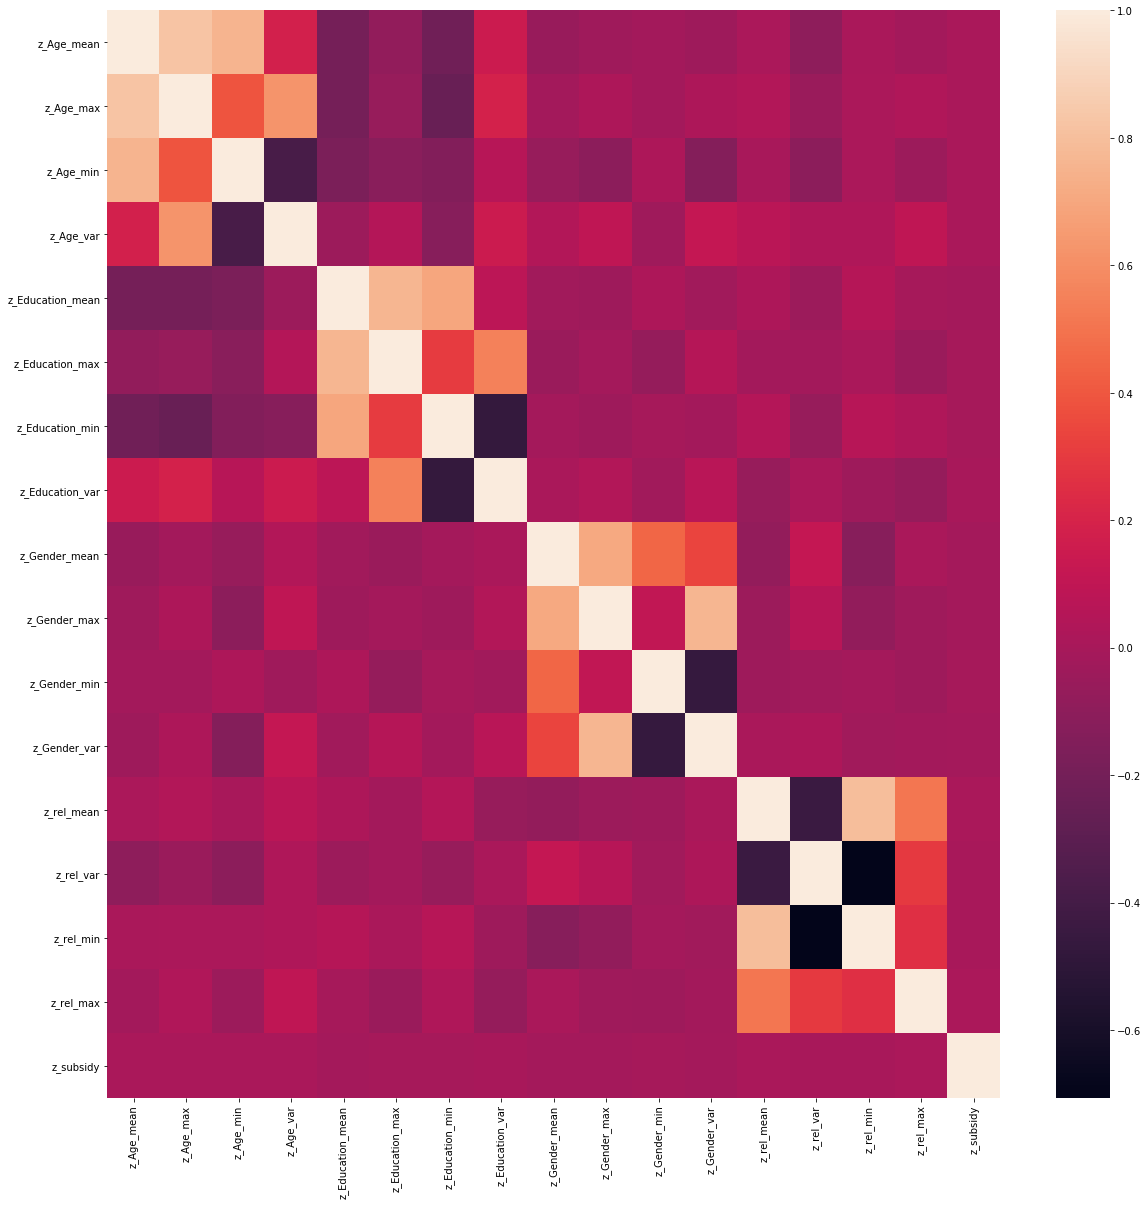

In [13]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data[explanatory_var].corr(), ax=ax)

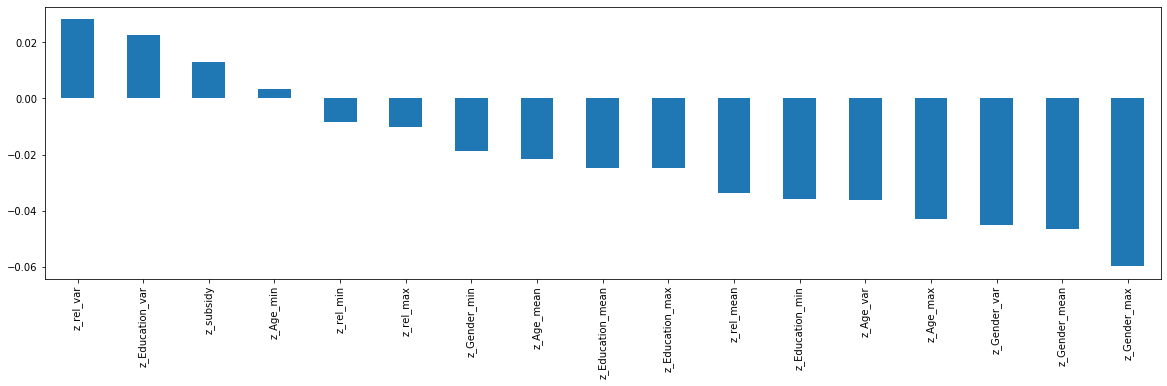

In [14]:
data[explanatory_var+[predictor_var]].corr()['z_varEnvProduction'].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(20,5))

In [15]:
data[explanatory_var].corr().unstack().sort_values(ascending=False)[17:]

z_Age_max        z_Age_mean         0.823143
z_Age_mean       z_Age_max          0.823143
z_rel_mean       z_rel_min          0.798391
z_rel_min        z_rel_mean         0.798391
z_Gender_max     z_Gender_var       0.762210
                                      ...   
z_Gender_var     z_Gender_min      -0.460825
z_Education_var  z_Education_min   -0.467192
z_Education_min  z_Education_var   -0.467192
z_rel_var        z_rel_min         -0.706082
z_rel_min        z_rel_var         -0.706082
Length: 272, dtype: float64

In [16]:
formula = predictor_var + ' ~ '
for var in explanatory_var:
    formula += var + ' + '
formula = formula[:-3]

In [17]:
model = sm.ols(formula, data=data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     z_varEnvProduction   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.352
Date:                Tue, 02 Mar 2021   Prob (F-statistic):              0.152
Time:                        09:29:11   Log-Likelihood:                -1923.9
No. Observations:                1478   AIC:                             3884.
Df Residuals:                    1460   BIC:                             3979.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0725      0.023  

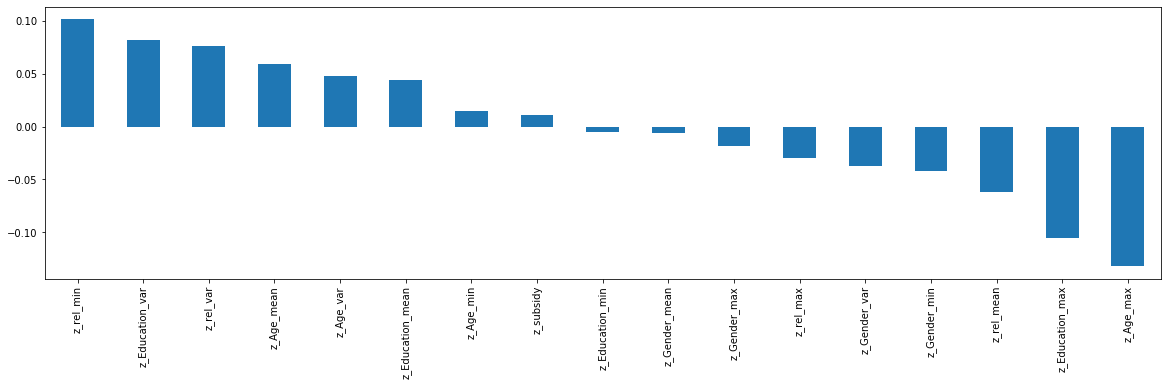

In [18]:
# plot coefficients
plt.figure(figsize=(20,5))
results.params.iloc[1:].sort_values(ascending=False).plot(kind='bar')

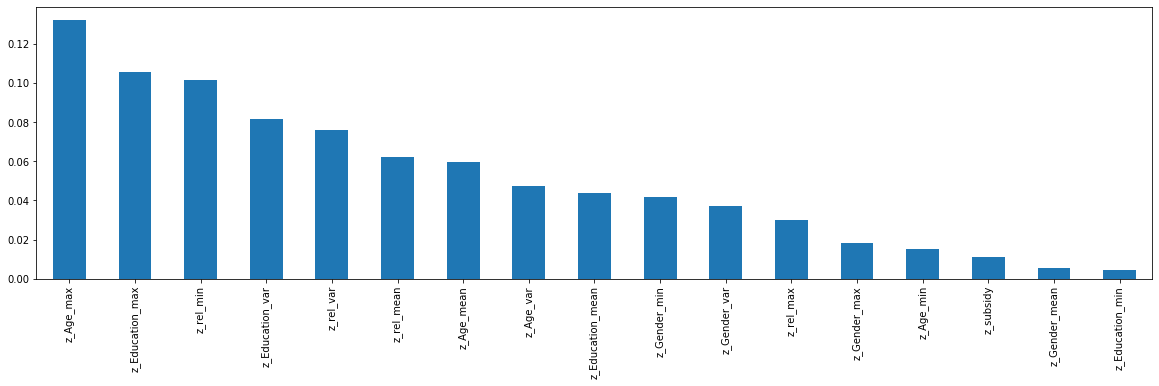

In [19]:
# plot absolute coefficients
plt.figure(figsize=(20,5))
results.params.iloc[1:].abs().sort_values(ascending=False).plot(kind='bar')

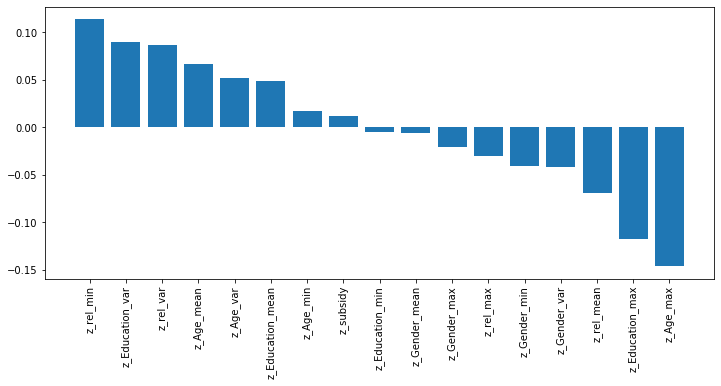

In [20]:
# plot beta coefficients
beta_coef = []
for var in results.params.index.values[1:]:
    beta_coef.append(results.params[var]*(data[var].std(ddof=0)/data['z_varEnvProduction'].std(ddof=0)))
beta_coef = pd.DataFrame({'params':results.params.index.values[1:], 'coefs':beta_coef}).sort_values('coefs', ascending=False)
plt.figure(figsize=(12,5))
plt.bar('params', 'coefs', data=beta_coef)
plt.xticks(rotation=90)
plt.show()

In [21]:
# plot likelihoods
#plt.figure(figsize=(20,5))
#np.exp(results.params.iloc[1:].normalize()).sort_values(ascending=False).plot(kind='bar')

In [22]:
orig_r2 = results.rsquared
for var in explanatory_var:
    temp_explanatory_var = explanatory_var.copy()
    temp_explanatory_var.remove(var)
    formula = predictor_var + ' ~ '
    for temp_var in temp_explanatory_var:
        formula += temp_var + ' + '
    formula = formula[:-3]
    temp_model = sm.ols(formula, data=data).fit()
    print(var, temp_model.rsquared-results.rsquared)

z_Age_mean -0.00043767556832763344
z_Age_max -0.0017852572188199467
z_Age_min -3.9072499627423873e-05
z_Age_var -0.0003645530361369165
z_Education_mean -0.0004033526925927289
z_Education_max -0.0023189947984814108
z_Education_min -5.964515103484835e-06
z_Education_var -0.00196589143301118
z_Gender_mean -1.33384208297338e-05
z_Gender_max -5.4681862386884994e-05
z_Gender_min -0.00042143983322995293
z_Gender_var -0.00020723769772601486
z_rel_mean -0.0012367634204361044
z_rel_var -0.0018479157777295807
z_rel_min -0.002443751575033515
z_rel_max -0.000334512172070478
z_subsidy -0.00014761417895969853


In [23]:
"""from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(data[explanatory_var])
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf.loc[:, 'principal component 1'],
           principalDf.loc[:, 'principal component 2'],
           c = data[predictor_var_1], s = 10, cmap='Blues')
ax.grid()"""

"from sklearn.preprocessing import StandardScaler\nfrom sklearn.decomposition import PCA\n\nx = StandardScaler().fit_transform(data[explanatory_var])\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(x)\nprincipalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])\n\nfig = plt.figure(figsize = (8,8))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\nax.scatter(principalDf.loc[:, 'principal component 1'],\n           principalDf.loc[:, 'principal component 2'],\n           c = data[predictor_var_1], s = 10, cmap='Blues')\nax.grid()"

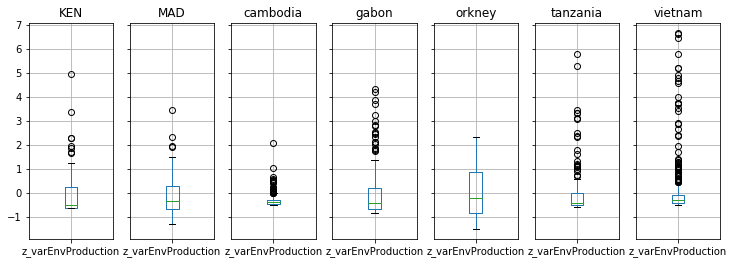

In [24]:
data[['z_varEnvProduction', 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,7))
plt.show()

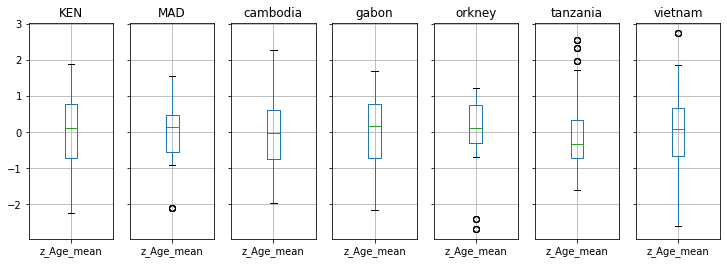

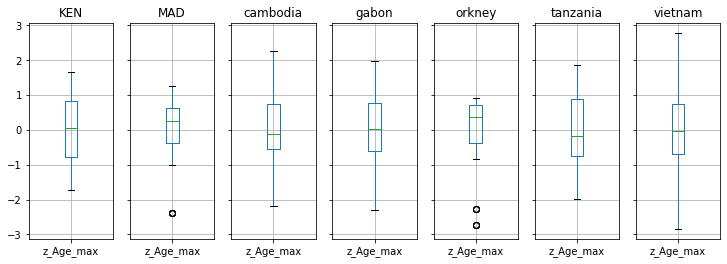

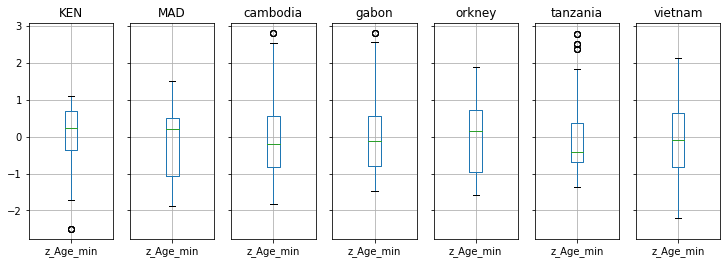

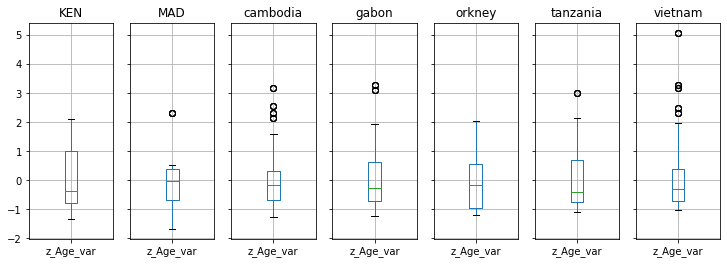

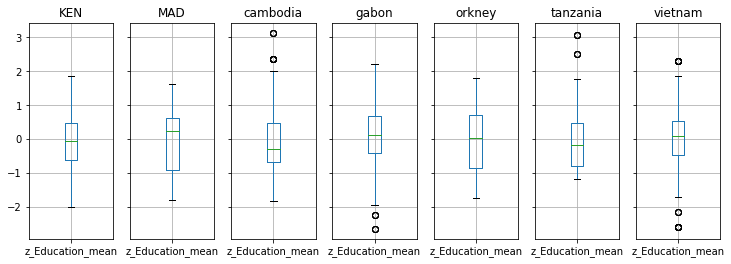

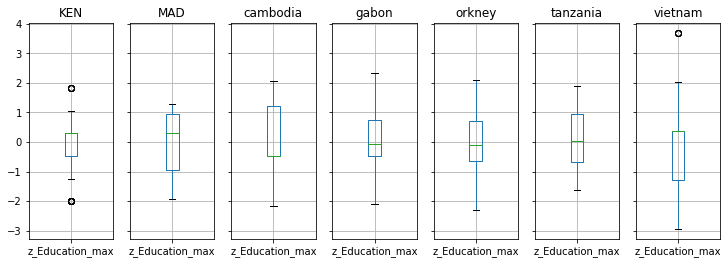

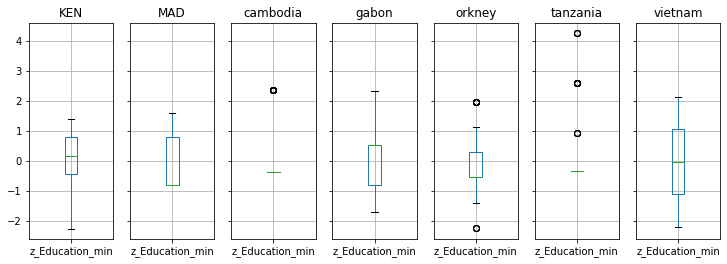

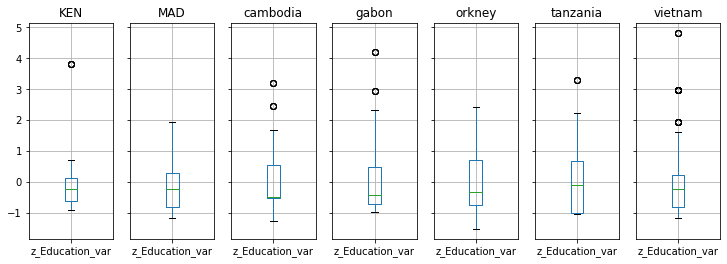

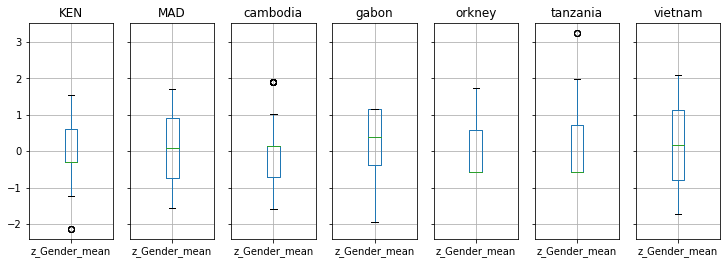

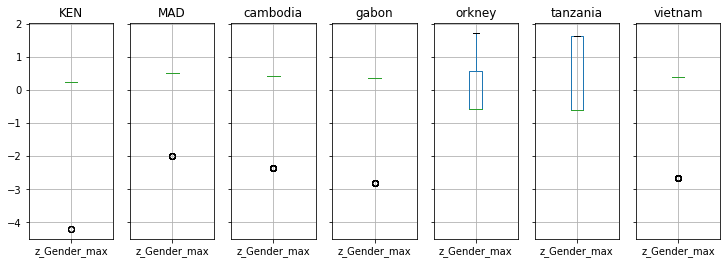

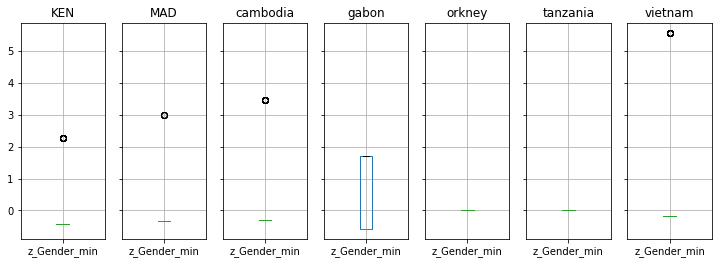

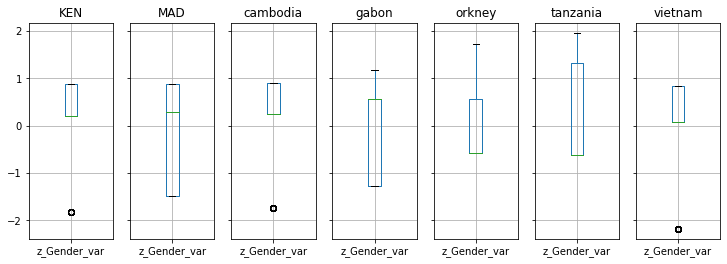

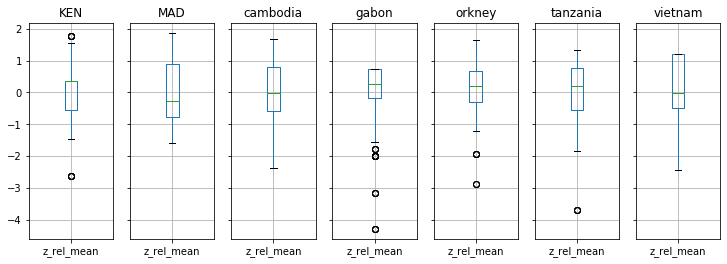

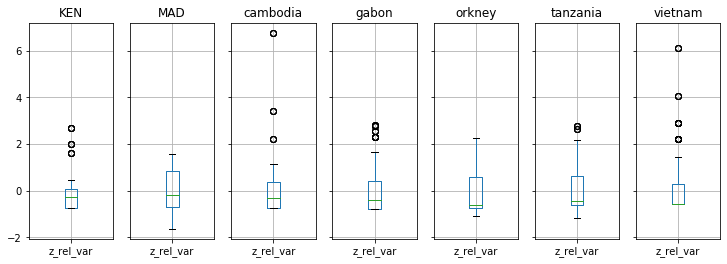

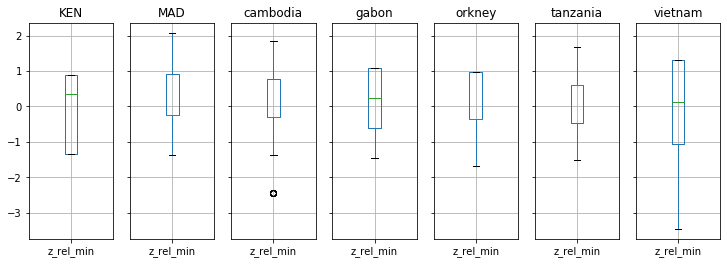

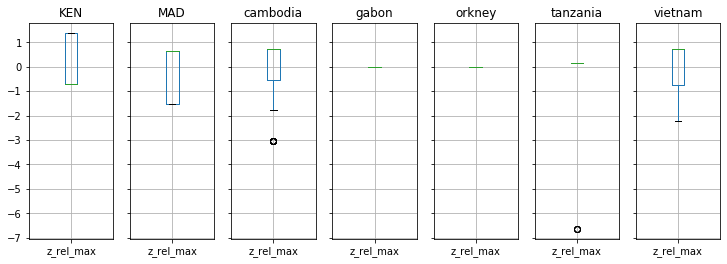

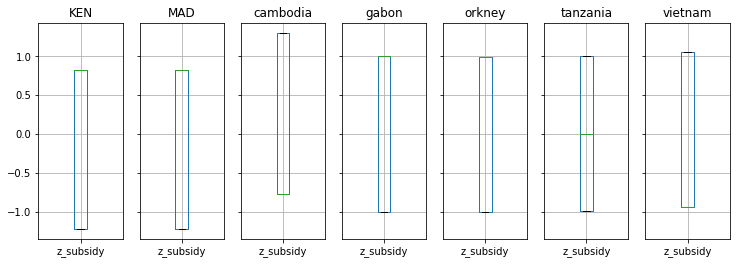

In [25]:
for var in explanatory_var:
    data[[var, 'country']].groupby('country').boxplot(figsize=(12,4), layout=(1,7))
    plt.savefig('country_'+var+'.png')
    plt.show()

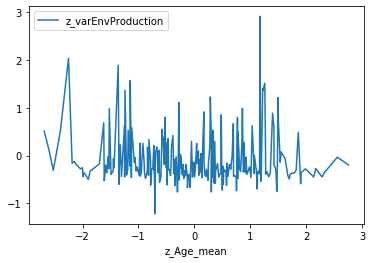

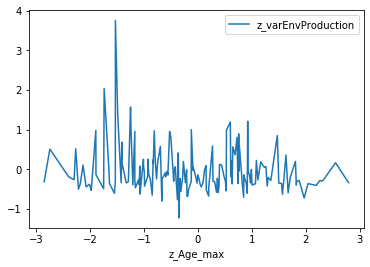

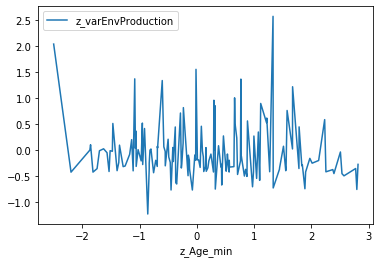

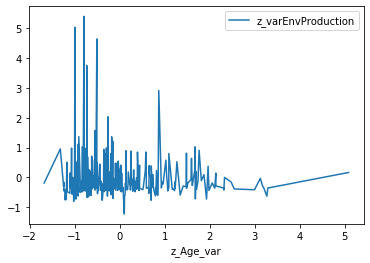

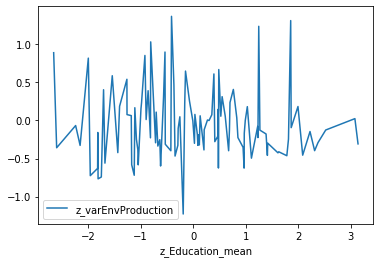

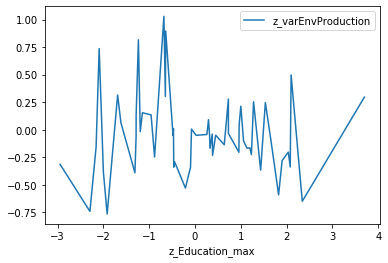

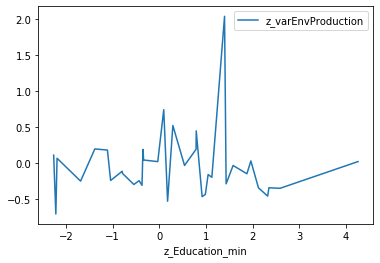

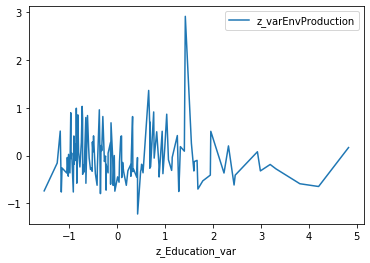

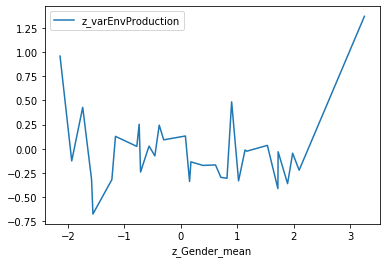

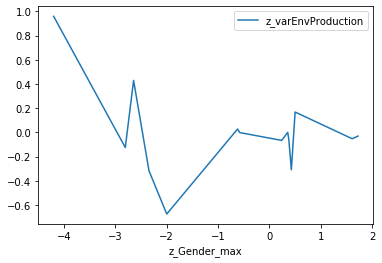

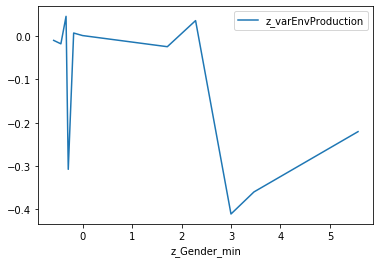

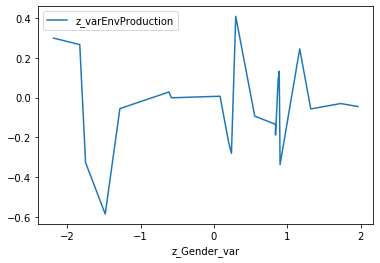

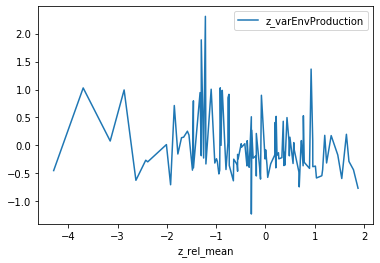

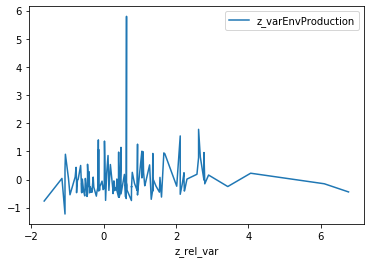

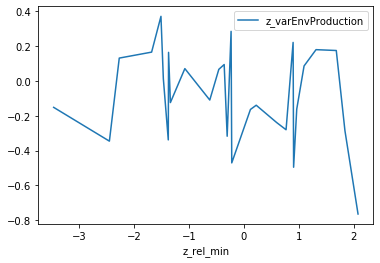

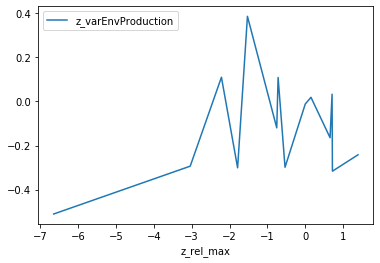

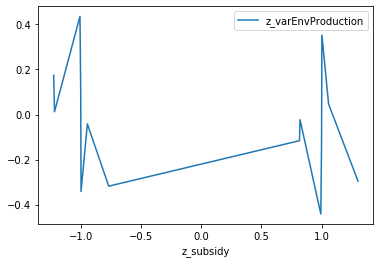

In [26]:
for var in explanatory_var:
    data[[var, 'z_varEnvProduction']].groupby(var).mean().plot()
    plt.savefig('envprod_'+var+'.png')
    plt.show()

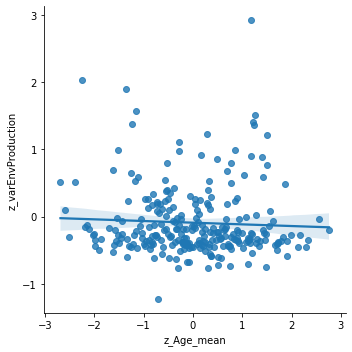

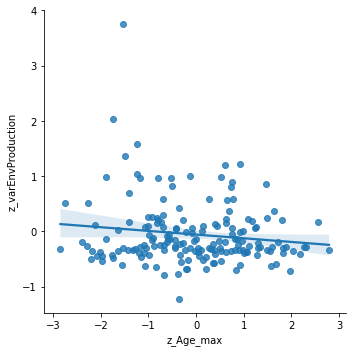

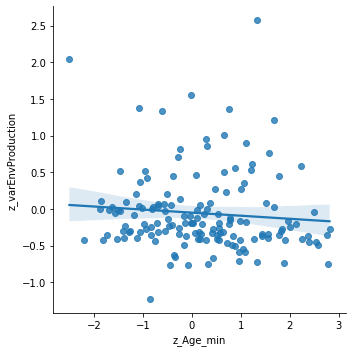

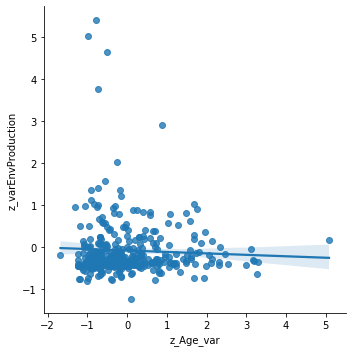

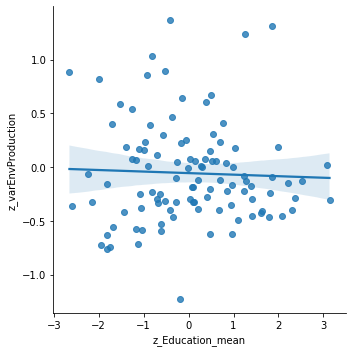

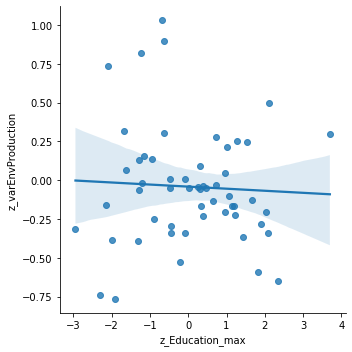

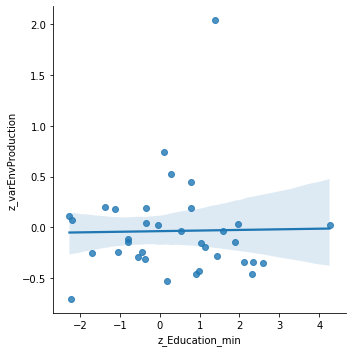

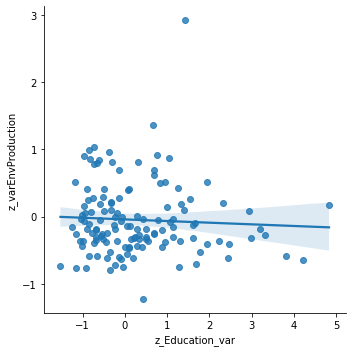

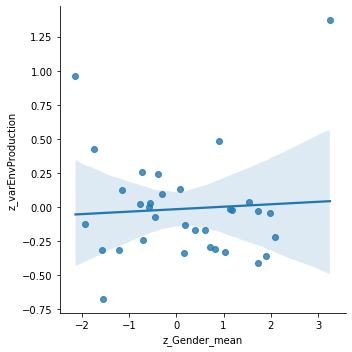

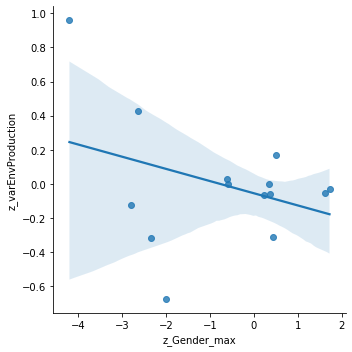

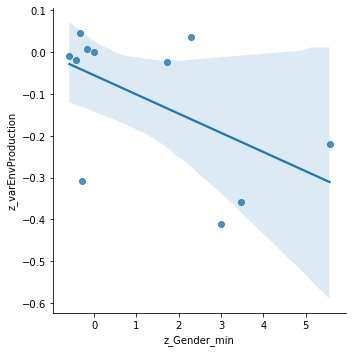

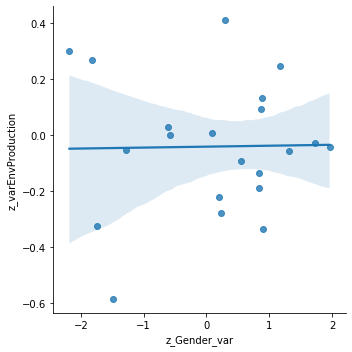

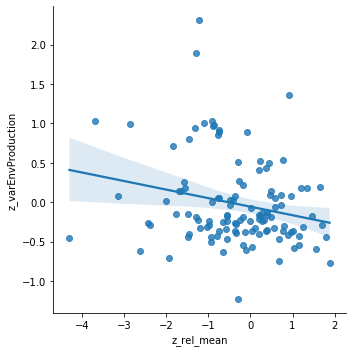

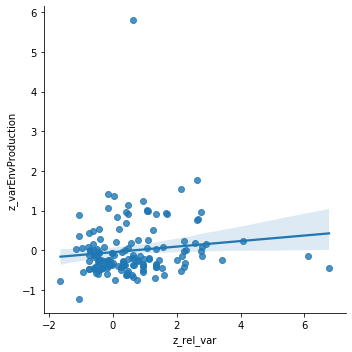

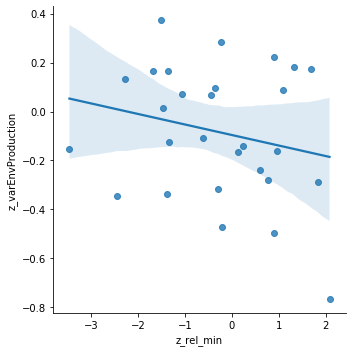

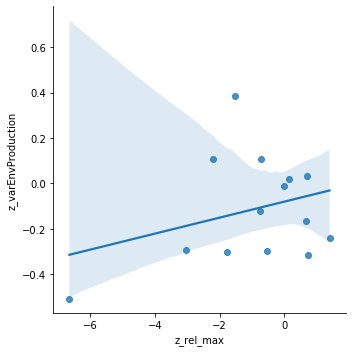

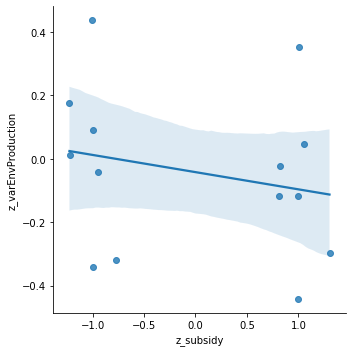

In [27]:
for var in explanatory_var:
    df = data[[var, 'z_varEnvProduction']].groupby(var).mean().reset_index()
    sns.lmplot(x=var, y='z_varEnvProduction', data=df, fit_reg=True) 
    plt.savefig('envprod_'+var+'.png')
    plt.show()